In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import load_iris

# Деревья принятия решений 
<p>Курс "Модели и методы интеллектуального анализа данных"</p>

# Содержание <a name='contents'></a>
<ol>
<li><a href='#intro'>Введение</a></li>
<li><a href='#method'>Описание работы алгоритма</a></li>
<li><a href='#sklearn'>Использование библиотеки sklearn</a></li>    
<li><a href='#example1'>Пример 1: анализ датасета iris</a></li>
<li><a href='#example2'>Пример 2: </a></li>
<li><a href='#links'>Ссылки</a></li>    
</ol>

## Введение <a name='intro'></a>

Деревья принятия решений - один из классических алгоритмов машинного обучения с учителем.

Дерево принятия решений (ДПР, другие названия – «дерево классификации», «регрессионное дерево», «решающее дерево») – инструмент прогнозного моделирования. В модели ДПР используется древовидная структура данных, которая описывает различные варианты принятия решений и результат для каждого из них. 

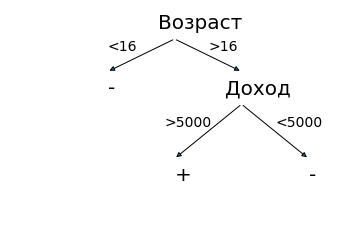

In [2]:
plt.xlim(0,10)
plt.ylim(0,10)
plt.text(4.5, 9, "Возраст", size=20)
plt.annotate ('', xy=(5, 8.5), xytext = (3,7), arrowprops = {'arrowstyle': '<|-',})
plt.text(3, 8, "<16", size=14)
plt.annotate ('', xy=(5, 8.5), xytext = (7,7), arrowprops = {'arrowstyle': '<|-',})
plt.text(6, 8, ">16", size=14)
plt.text(6.5, 6, "Доход", size=20)
plt.annotate ('', xy=(7, 5.5), xytext = (5,3), arrowprops = {'arrowstyle': '<|-',})
plt.text(4.7, 4.5, ">5000", size=14)
plt.annotate ('', xy=(7, 5.5), xytext = (9,3), arrowprops = {'arrowstyle': '<|-',})
plt.text(8, 4.5, "<5000", size=14)
plt.text(3, 6, "-", size=20)
plt.text(5, 2, "+", size=20)
plt.text(9, 2, "-", size=20)
plt.axis('off')
plt.show()

Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны атрибуты, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — атрибуты, по которым различаются случаи. Чтобы классифицировать новый случай, надо "спуститься" по дереву до листа и выдать соответствующее значение. 

Подобные деревья решений широко используются в интеллектуальном анализе данных, например, в банках (кредитный скоринг), в рекомендательных системах торговых онлайн-площадок (подбор наиболее подходящего товара), маркетинговом анализе (оценка лояльности клиентов). Цель состоит в том, чтобы создать модель, которая предсказывает значение целевой переменной на основе нескольких переменных на входе.

При построении дерева принятия решений используется понятие энтропии ("меры беспорядка"). Энтропия характеризует меру беспорядка (хаоса)

Рассмотрим "игрушечный" пример.

<im src='DA-DecisionTree-pic1.png'>

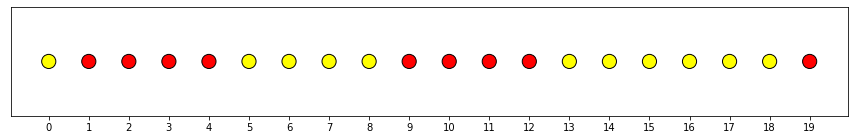

In [3]:
X = range(20)
colors = [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
plt.figure(figsize=(15,2))
plt.xticks(X)
plt.yticks([])
plt.scatter(X, np.ones(len(X)), c=colors, s=200, cmap='autumn', edgecolors='black', linewidths=1)
plt.show()

Вероятности того, что мы вытянем синий шар и желтый шар вычисляются по формуле $P=\frac{m}{n}$, $m$ - количество благоприятных случаев, $n$ - общее количество случаев. Всего шаров 20, из них желтых - 11, а красных - 9.

In [4]:
print("Вероятность вытянуть желтый шар: {}, вероятность вытянуть красный шар: {}".format(11/20, 9/20))

Вероятность вытянуть желтый шар: 0.55, вероятность вытянуть красный шар: 0.45


Вычислим энтропию данной системы по формуле
$$
S = -\sum_{i=1}^{n}{p_i \log_2{p_i}},
$$
где $p_i$ - вероятность того, что система находится в $i$-м состоянии. В нашем случае
$$
S_0 = -\frac{11}{20} \log_2 \frac{11}{20}-\frac{9}{20}\log_2 \frac{9}{20} \approx 1
$$

In [5]:
S0 = -11/20*np.log2(11/20)-9/20*np.log2(9/20)
print("Энтропия системы: {}".format(S0))

Энтропия системы: 0.9927744539878083


Разделим выборку на две подвыборки по следующему правилу - в одну выборку поместим шары с порядковым номером меньшим или равным 12, в другую - все остальные.

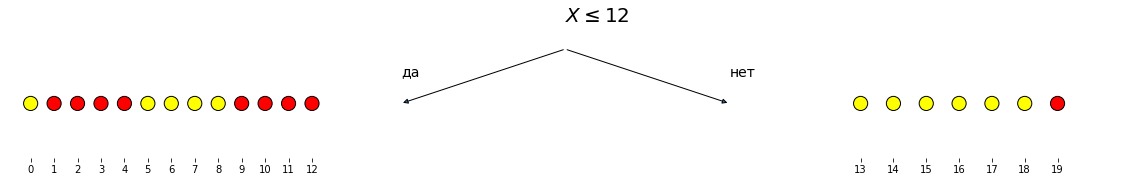

In [6]:
plt.figure(figsize=(20,2))

ax1 = plt.subplot(1,3,1, frameon=False, xticks=X[:13],  yticks=[], xlim=[-1,13], ylim=[0, 2])
ax2 = plt.subplot(1,3,2, frameon=False, xticks=[], yticks=[], xlim=[1,2], ylim=[0, 2])
ax3 = plt.subplot(1,3,3, frameon=False, xticks=X[13:],  yticks=[], xlim=[11,21], ylim=[0, 2])

ax1.scatter(X[:13], np.ones(len(X[:13])), c=colors[:13], s=200, cmap='autumn', edgecolors='black', linewidths=1)
ax2.text(1.5, 2.5, u'$ X \\leq 12$', size=20)
ax2.annotate ('', xy=(1.5, 2), xytext = (1,1), arrowprops = {'arrowstyle': '<|-',})
ax2.text(1, 1.5, "да", size=14)
ax2.annotate ('', xy=(1.5, 2), xytext = (2,1), arrowprops = {'arrowstyle': '<|-',})
ax2.text(2, 1.5, "нет", size=14)
ax3.scatter(X[13:], np.ones(len(X[13:])), c=colors[13:], s=200, cmap='autumn', edgecolors='black', linewidths=1)

plt.show()

Для левой и правой выборок отдельно посчитаем энтропию. В левой выборке 13 шаров (5 желтых и 8 красных), в правой выборке 7 шаров (6 желтых и 1 красный).
Энтропия левой выборки вычисляется по формуле
$$
S_1 = -\frac{5}{13} \log_2 \frac{5}{13} - \frac{8}{13}\log_2 \frac{8}{13},
$$
Энтропия правой выборки вычисляется по формуле
$$
S_2 = -\frac{6}{7} \log_2 \frac{6}{7} - \frac{1}{7}\log_2 \frac{1}{7},
$$

In [7]:
S1, S2 = -5/13*np.log2(5/13)-8/13*np.log2(8/13), -6/7*np.log2(6/7)-1/7*np.log2(1/7)
print("Энтропия левой выборки равна {}".format(S1))
print("Энтропия правой выборки равна {}".format(S2))

Энтропия левой выборки равна 0.9612366047228759
Энтропия правой выборки равна 0.5916727785823275


Видим, что при разбиении по признаку (меньше или больше 12) мы получили две меньшие выборки, каждая из которых имеет меньшую энтропию.

Кроме энтропии $S$, характеризующей увеличение беспорядка, используется величина "прирост информации" (IG, information gain), которая формально задается следующим соотношением

$$
IG(Q) = S_0 - \sum_{i=1}^{q}{\frac{N_i}{N}S_i},
$$
где $q$ - количество выборок, на которые разбивается исходная выборка с использованием правила $Q$.

Для разбиения $12\le x$ величина IG(Q) вычисляется следующим образом:

$$
IG(X\le 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2
\approx
0.99 - \frac{13}{20}\left( -\frac{5}{13} \log_2{\frac{5}{13}} -\frac{8}{13} \log_2{\frac{8}{13}}\right) - 
\frac{7}{20}\left( -\frac{6}{7} \log_2{\frac{6}{7}} -\frac{2}{7} \log_2{\frac{2}{7}}\right) 
\approx 0.16
$$

In [8]:
print("Прирост информации при разделении на выборки: {}".format(S0-13/20*S1-7/20*S2))

Прирост информации при разделении на выборки: 0.16088518841412436


При построении дерева принятия решений продолжают разбиение по аналогии, уменшая энтропию (увеличивая прирост информации). Продолжая в рассматриваемом примере процедуру получим следующее дерево принятия решений.

<img src='DA-pic.jpg'>

Кроме энтропии используются и другие метрики: неопределенность Джини $G = 1-\sum_{k}{(p_k)^2}$, Misclassification Error $J = 1-\sum_{k}{|p_k|}$.

# Классификатор sklearn.tree.DecisionTreeClassifier() <a name='sklearn'></a>

В стандартной библиотеке sklearn есть модуль tree с инструментами для работы с деревьями принятия решений (построение, анализ, оценка). В том числе классификатор DecisionTreeClassifier().

Кроме того, загрузим для работы функции train_test_split (для разделения имеющегося набора данных на тренировочную (train) и проверочную (check) выборки), а также функцию cross_val_score (для оценки качества работы классификатора).

Создаем объект-классификатор

In [9]:
#sklearn.tree.DecisionTreeClassifier()
clf = DecisionTreeClassifier()

Создаем набор тренировочных данных с метками (X1 - набор точек с метками "0", нормально распределенных около точки (1,1), X2 - набор точек с метками "1", нормально распределенных около точки (2,2)).

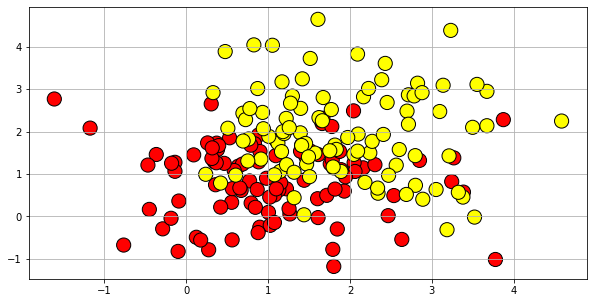

In [10]:
n = 100
X1 = np.random.normal(size=(n,2), loc=1)
y1 = np.array([0 for _ in range(n)])
X2 = np.random.normal(size=(n,2), loc=2)
y2 = np.array([1 for _ in range(n)])
X = np.r_[X1, X2]
y = np.r_[y1, y2]
plt.rcParams['figure.figsize'] = (10,5)
plt.grid(True)
plt.scatter(X[:,0], X[:,1], c=y, s=200, cmap='autumn', edgecolors='black', linewidths=1);

Из графика видно, что множества желтых и красных шаров линейно неразделимы (нельзя построить прямую линию, которая их отделит друг от друга). Тем не менее, имеющиеся данные мы можем использовать для построения классификатора.

Делим набор данных на тренировочный (данные X_train с метками y_train) и проверочный (данные X_check с метками y_check), доля проверочных данных - 30%.

In [11]:
# sklearn.model_selection.train_test_split()
X_train, X_check, y_train, y_check = train_test_split(X, y, test_size=0.3)

Обучаем построенный классификатор, смотрим параметры. Самые часто используемые и анализируемые параметры: 

* max_depth - максимальная глубина дерева

* max_features - максимальное количество признаков (features), используемых для построения дерева (разбиения выборок)

* max_leaf_nodes - максимальное количество листьев, которые могут быть у дерева

На параметры обычно устанавливают ограничения, чтобы избежать переобучения модели.

In [12]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Оценим качество работы построенного классификатора по проверочной выборке.

In [13]:
clf.score(X_check, y_check)

0.6833333333333333

Попробуем предсказать отношение к классам ("желтый"-"красный") произвольных точек с координатами (3,4), (0,4), (3,0), (1,2), (1.8,0), (4,4).

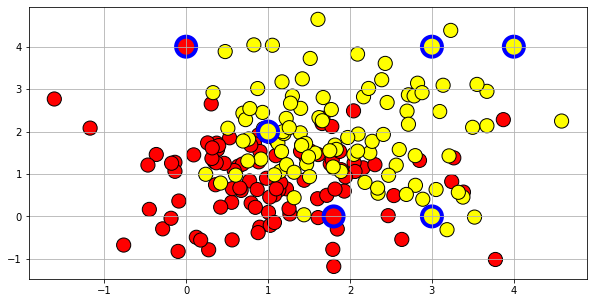

In [14]:
P = np.array([[3,4],[0,4],[3,0],[1,2],[1.8,0],[4,4]])
r = clf.predict(P)
plt.figure(figsize = (10,5))
plt.scatter(X[:,0], X[:,1], c=y, s=200, cmap='autumn', edgecolors='black', linewidths=1);
plt.scatter(P[:,0], P[:,1], c=r, s=400, cmap='autumn', edgecolors='blue',  linewidths=4)
plt.grid(True)
plt.show()

Оценка качества работы модели с помощью кросс-валидации (cv - количество выборок разбиения, n_jobs - количество используемых ядер (-1 - все ядра), verbose - управление выводом на экран)

In [15]:
# sklearn.model_selection.cross_val_score()
result = cross_val_score(clf, X, y, cv=5, n_jobs=-1, verbose=1)
print(result)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[0.65  0.6   0.65  0.7   0.625]


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


Постараемся улучшить качество работы классификатора с помощью подбора оптимальных значений параметров.

In [16]:
parameteres = {'max_depth': list(range(1, 5)), 
               'max_features': list(range(1, 2)),
               'max_leaf_nodes': list(range(2, 5))
              }

In [17]:
# sklearn.model_selection.GridSearchCV()
clf_grid = GridSearchCV(clf, param_grid=parameteres, cv=5, n_jobs=-1)

In [18]:
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4], 'max_features': [1],
                         'max_leaf_nodes': [2, 3, 4]})

Оптимальные значения параметров

In [19]:
print(clf_grid.best_params_)

{'max_depth': 1, 'max_features': 1, 'max_leaf_nodes': 2}


Оценка работы классификатора после улучшения

In [20]:
print(clf_grid.best_score_)

0.7428571428571429


Информация об оптимизированном классификаторе

In [21]:
print(clf_grid.best_estimator_)

DecisionTreeClassifier(max_depth=1, max_features=1, max_leaf_nodes=2)


В итоге классификатор с оптимизированными параметрами дает лучший результат на проверочной выборке.

In [22]:
clf_grid.score(X_check, y_check)

0.55

Визуализация построенной модели классификатора: закрасим цветами области, попадание в которые будет классифицироваться как отнесение к разным классам.

In [23]:
x_grid, y_grid = np.meshgrid(np.arange(X[:,0].min()-1, X[:,0].max()+1, 0.1), 
                             np.arange(X[:,1].min()-1, X[:,1].max()+1, 0.1))

In [24]:
predict = clf_grid.predict(np.c_[x_grid.ravel(), y_grid.ravel()]).reshape(x_grid.shape)

<ipython-input-25-ba25cbdc72f7>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_grid, y_grid, predict, cmap='autumn')


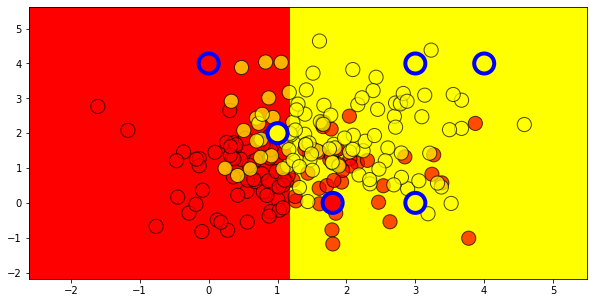

In [25]:
plt.figure(figsize=(10,5))
plt.pcolormesh(x_grid, y_grid, predict, cmap='autumn')
plt.scatter(X[:,0], X[:,1], c=y, s=200, cmap='autumn', edgecolors='black', linewidths=1, alpha=0.7);
plt.scatter(P[:,0], P[:,1], c=r, s=400, cmap='autumn', edgecolors='blue',  linewidths=4)
plt.show()

In [26]:
clf_grid.best_estimator_

DecisionTreeClassifier(max_depth=1, max_features=1, max_leaf_nodes=2)

In [27]:
clf_grid.score(X_train, y_train), clf_grid.score(X_check, y_check)

(0.75, 0.55)

Пример переобучения. Если не ограничивать (не подбирать оптимальные) параметры модели, то модель может переобучиться, построив дерево слишком большой глубины, или с листами из малого количества элементов. Ограничим параметры max_depth=2, min_samples_leaf=5

In [28]:
# sklearn.tree.DecisionTreeClassifier()
clf1 = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=3)
clf1.fit(X_train, y_train)
predict1 = clf1.predict(np.c_[x_grid.ravel(), y_grid.ravel()]).reshape(x_grid.shape)
clf1.score(X_train, y_train), clf1.score(X_check, y_check)

(0.75, 0.55)

<ipython-input-29-8287fc33dc21>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_grid, y_grid, predict1, cmap='autumn')


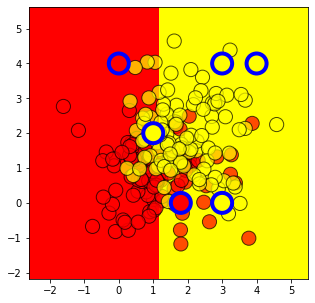

In [29]:
plt.figure(figsize=(5,5))
plt.pcolormesh(x_grid, y_grid, predict1, cmap='autumn')
plt.scatter(X[:,0], X[:,1], c=y, s=200, cmap='autumn', edgecolors='black', linewidths=1,alpha=0.7);
plt.scatter(P[:,0], P[:,1], c=r, s=400, cmap='autumn', edgecolors='blue',  linewidths=4)
plt.show()

Видим, что модель, хорошо обучившись на тренировочной выборке X_train показывает очень высокий результат (1.0), однако на проверочной выборке X_valid результаты плохие (0.6). Обратная ситуация с построенным классификатором clf_grid, для которого мы оптимизировали параметры.

[Text(279.0, 203.85000000000002, 'x1 <= 1.111\ngini = 0.5\nsamples = 140\nvalue = [70, 70]\nclass = red'),
 Text(139.5, 67.94999999999999, 'gini = 0.298\nsamples = 55\nvalue = [45, 10]\nclass = red'),
 Text(418.5, 67.94999999999999, 'gini = 0.415\nsamples = 85\nvalue = [25, 60]\nclass = yellow')]

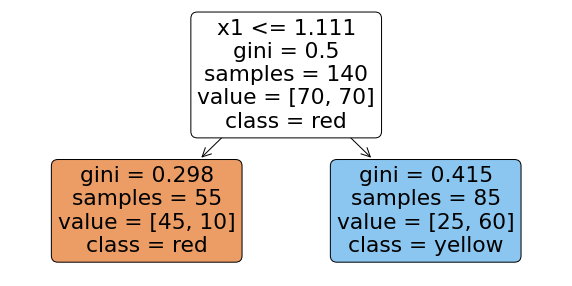

In [30]:
plot_tree(clf_grid.best_estimator_, 
          filled=True, 
          feature_names=["x1","x2"], 
          class_names=['red', 'yellow'], 
          rounded=True)    

<img src='tree.png'></img>

# Пример 1: анализ датасета iris <a name='example1'></a>

[Text(558.0, 647.79, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(472.15384615384613, 530.01, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(643.8461538461538, 530.01, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(343.38461538461536, 412.22999999999996, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(171.69230769230768, 294.45, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(85.84615384615384, 176.66999999999996, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(257.53846153846155, 176.66999999999996, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(515.0769230769231, 294.45, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(429.23076923076917,

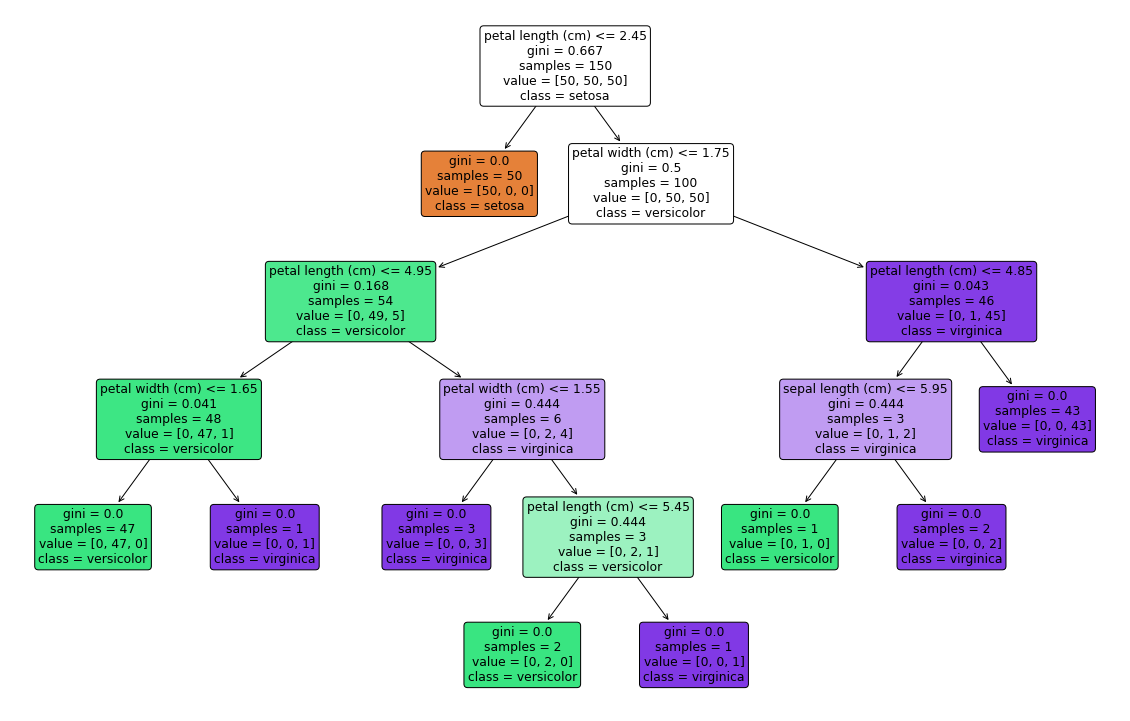

In [31]:
# Load data
# sklearn.datasets.load_iris()
iris = load_iris()
plt.figure(figsize=((20,13)))

# sklearn.tree.DecisionTreeClassifier()
clf = DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

# sklearn.tree.plot_tree()
plot_tree(clf, 
          filled=True, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          rounded=True)

#clf.predict(iris.data, iris.target)

<a href='#contents'>Назад к Содержанию</a>

# Пример 2:  <a name='example2'></a>

In [32]:
# Придумайте сами... )


<a href='#contents'>Назад к Содержанию</a>

# Ссылки <a name='links'></a>

- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

<a href='#contents'>Назад к Содержанию</a>